In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns               # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()
from subprocess import check_output
import plotly.express as px

import warnings                                            # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [5]:
df = pd.read_excel('Data\Labeled_3 with avg.xlsx',sheet_name='Labeled_3')
df.Response = df.Response.apply(lambda X : 0 if X == 'No' else 1)
df.EmploymentStatus = df.EmploymentStatus.apply(lambda X : 1 if X == 'Employed' else 0)
df = df.rename(columns={'Customer Lifetime Value':'CLV'})
df["IncomeGroup"] = pd.cut(df["Income"], [10000, 30000, 50000, 70000, df["Income"].max()], 
       labels=["10K - 30K", "30K - 50K", "50K - 70K", "Above 70K"], ordered=False)
df["IncomeGroup"] = df["IncomeGroup"].astype(str)
df["IncomeGroup"].fillna("Zero Income", inplace=True)


quantile8 = df['CLV'].quantile(0.8)
df['Quantile'] = df['CLV'].apply(lambda x: 8 if x<quantile8 else 2)
df2 = df[df['CLV']>=quantile8]
df1 = df[df['Label']==0]
df8 = df[df['CLV']<quantile8]

In [3]:
df.groupby('Label').count()/len(df)

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State,Response,...,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,IncomeGroup,Quantile
Label,,,,,,,,,,,,,,,,,,,,,
0,0.422925,0.422925,0.422925,0.422925,0.422925,0.422925,0.422925,0.422925,0.422925,0.422925,...,0.422925,0.422925,0.422925,0.422925,0.422925,0.422925,0.422925,0.422925,0.422925,0.422925
1,0.173637,0.173637,0.173637,0.173637,0.173637,0.173637,0.173637,0.173637,0.173637,0.173637,...,0.173637,0.173637,0.173637,0.173637,0.173637,0.173637,0.173637,0.173637,0.173637,0.173637
2,0.403438,0.403438,0.403438,0.403438,0.403438,0.403438,0.403438,0.403438,0.403438,0.403438,...,0.403438,0.403438,0.403438,0.403438,0.403438,0.403438,0.403438,0.403438,0.403438,0.403438


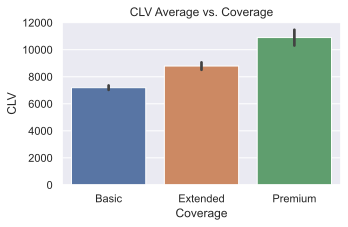

In [3]:
plt.figure(figsize=(5,3))
sns.barplot(data=df,x='Coverage',y='CLV')
plt.title('CLV Average vs. Coverage')
plt.show()

In [4]:
df['Label'].value_counts()/len(df)

0    0.422925
2    0.403438
1    0.173637
Name: Label, dtype: float64

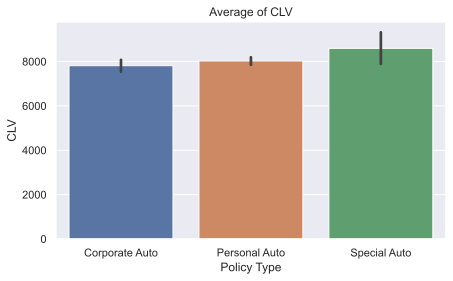

In [5]:
plt.figure(figsize=(7,4))
sns.barplot(data=df,x='Policy Type',y='CLV')
plt.title('Average of CLV')
plt.show()

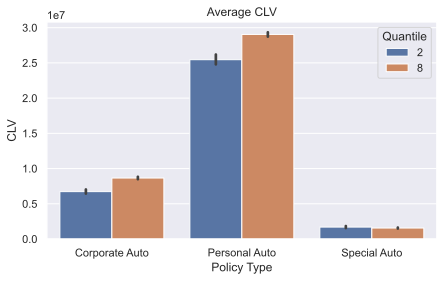

In [6]:
plt.figure(figsize=(7,4))
plt.title('Average CLV')
sns.barplot(data=df,x='Policy Type',y='CLV',hue='Quantile',estimator=sum)
plt.show()

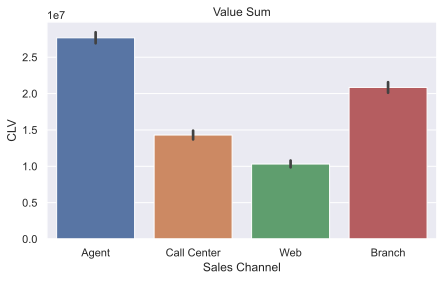

In [12]:
plt.figure(figsize=(7,4))
plt.title('Value Sum')
sns.barplot(data=df,x='Sales Channel',y='CLV',estimator=sum)
plt.show()

Text(0, 0.5, 'Claims')

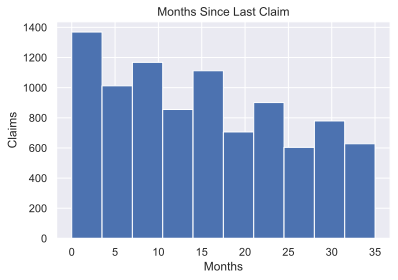

In [5]:
plt.title('Months Since Last Claim')
plt.hist(df['Months Since Last Claim'])
plt.xlabel('Months')
plt.ylabel('Claims')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<Figure size 900x600 with 0 Axes>

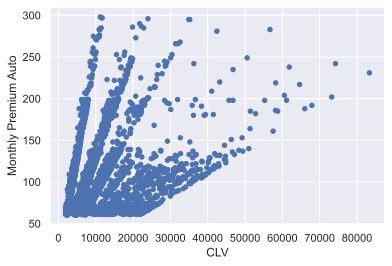

In [7]:
plt.figure(dpi=150)
df.plot.scatter(x='CLV',y='Monthly Premium Auto')
plt.show()

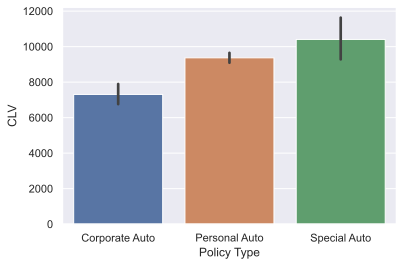

In [8]:
plt.figure(dpi=150)
sns.barplot(x = 'Policy Type', y = 'CLV', data = df1)
plt.show()

Text(0.5, 1.0, 'Average Response Rate')

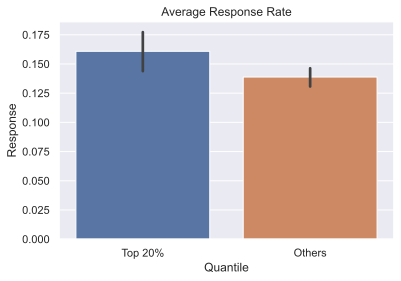

In [9]:
sns.barplot(x='Quantile',y='Response',data=df)
plt.xticks([0,1],['Top 20%','Others'])
plt.title('Average Response Rate')

In [17]:
df.groupby(['Label']).sum()['CLV']

Label
0    3.553795e+07
1    1.273869e+07
2    2.484049e+07
Name: CLV, dtype: float64

Text(0.5, 1.0, 'Value')

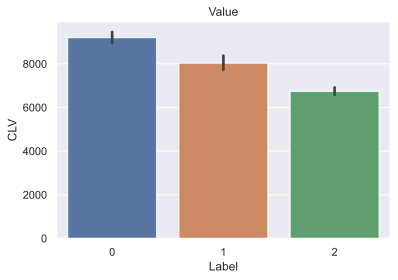

In [14]:
sns.barplot(x='Label',y='CLV',data=df)#,estimator=sum)
plt.title('Value')

Label
0    0.153249
1    0.148172
2    0.130529
Name: Response, dtype: float64


Text(0.5, 1.0, 'Average Response Rate')

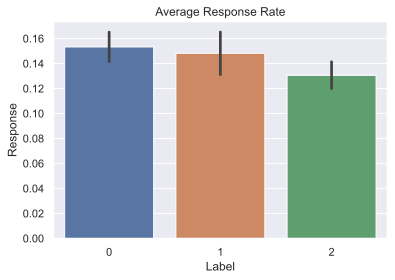

In [15]:
print(df.groupby('Label').mean()['Response'])
sns.barplot(x='Label',y='Response',data=df)
plt.title('Average Response Rate')

Text(0.5, 1.0, 'Total Claim Amount')

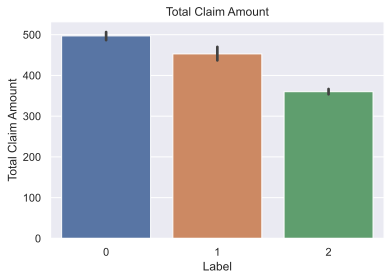

In [32]:
sns.barplot(x='Label',y='Total Claim Amount',data=df)
plt.title('Total Claim Amount')

Text(0.5, 1.0, 'Monthly Premium Auto')

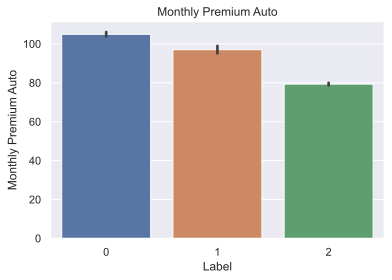

In [33]:
sns.barplot(x='Label',y='Monthly Premium Auto',data=df)
plt.title('Monthly Premium Auto')

In [44]:
col = 'Marital Status'

df['Customer'] = np.arange(len(df))
temp = df.pivot_table(values="Customer", index=["Label", col], aggfunc="count")
temp.reset_index(inplace=True)
fig = px.bar(temp, x="Label", y="Customer", color=col, title="Distribution of "+col+" across Clusters")
fig.show()